<a href="https://colab.research.google.com/github/agnibrainhack/AmexModel/blob/master/AmEx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import time
import datetime

In [2]:
dataset = pd.read_csv('train.csv')
dataset2 = pd.read_csv('test.csv')

In [3]:
dt = dataset.copy()
dt2 = dataset2.copy()

In [4]:
dataset = dt.copy()
dataset2 = dt2.copy()

In [5]:
dataset.shape, dataset2.shape

((463291, 15), (128858, 14))

In [6]:
dataset.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


In [7]:
dataset['product_category_2'] = dataset['product_category_2'].fillna(0)
dataset['product_category_2']  = dataset['product_category_2'].apply(lambda x: '1' if x >0 else '0')

dataset2['product_category_2'] = dataset2['product_category_2'].fillna(0)
dataset2['product_category_2']  = dataset2['product_category_2'].apply(lambda x: '1' if x >0 else '0')

In [8]:
dataset.shape, dataset2.shape

((463291, 15), (128858, 14))

In [9]:
dataset['gender'] = dataset['gender'].map({'Female':0,'Male':1})
dataset2['gender'] = dataset2['gender'].map({'Female':0,'Male':1})

In [10]:
fill_nan = {'user_group_id':dataset['user_group_id'].mean(),
           'gender':1,
           'age_level':dataset['age_level'].mean()}
fill_nan

{'user_group_id': 3.4773956966439576,
 'gender': 1,
 'age_level': 2.782266182524132}

In [11]:
dataset.fillna(value=fill_nan, inplace=True)
dataset2.fillna(value=fill_nan, inplace=True)

In [12]:
# dataset = dataset.dropna(how ='all',axis =0)

# dataset2 = dataset2.dropna(how ='all',axis =0)

In [13]:
dataset.shape, dataset2.shape

((463291, 15), (128858, 14))

In [14]:
dataset.drop('session_id', axis=1, inplace=True)
dataset.drop('user_depth', axis=1, inplace=True)
dataset.drop('campaign_id', axis=1, inplace=True)

dataset2.drop('user_depth',axis=1, inplace=True)
dataset2.drop('campaign_id',axis=1, inplace=True)

In [15]:
dataset.isnull().sum()

DateTime                       0
user_id                        0
product                        0
webpage_id                     0
product_category_1             0
product_category_2             0
user_group_id                  0
gender                         0
age_level                      0
city_development_index    125129
var_1                          0
is_click                       0
dtype: int64

In [16]:
dataset2.isnull().sum()

session_id                    0
DateTime                      0
user_id                       0
product                       0
webpage_id                    0
product_category_1            0
product_category_2            0
user_group_id                 0
gender                        0
age_level                     0
city_development_index    34609
var_1                         0
dtype: int64

In [17]:
dataset.shape, dataset2.shape

((463291, 12), (128858, 12))

In [18]:
def cluster(x):
    if x <= 10800:
        return 0
    if x > 10800 and x <= 21600:
        return 1
    if x > 21600 and x <= 32400:
        return 2
    if x > 32400 and x <= 43200:
        return 3
    if x > 43200 and x <= 54000:
        return 4
    if x > 54000 and x <= 64800:
        return 5
    if x > 64800 and x <= 75600:
        return 6
    if x > 75600 and x <= 86400:
        return 7
    if x > 86400 and x <= 97200:
        return 0
    if x > 97200 and x <= 108000:
        return 1
    if x > 108000 and x <= 118800:
        return 2
    if x > 118800 and x <= 129600:
        return 3
    if x > 129600 and x <= 140400:
        return 4
    if x > 140400 and x <= 151200:
        return 5
    if x > 151200 and x <= 162000:
        return 6
    if x > 162000 and x <= 172800:
        return 7
    if x > 172800 and x <= 183600:
        return 0
    if x > 183600 and x <= 194400:
        return 1
    if x > 194400 and x <= 205200:
        return 2
    if x > 205200 and x <= 216000:
        return 3
    if x > 216000 and x <= 226800:
        return 4
    if x > 226800 and x <= 237600:
        return 5
    if x > 237600 and x <= 248400:
        return 6
    if x > 248400 and x <= 259200:
        return 7
    if x > 259200:
        return 0


In [19]:
# first one for test
dataset2['DateTime'] = dataset2['DateTime'].map(lambda x: time.mktime(datetime.datetime.
       strptime(x, "%Y-%m-%d %H:%M").timetuple())-1499452200).astype('int64')
dataset2['DateTime'] = dataset2['DateTime'].apply(cluster)
#second one for train
dataset['DateTime'] = dataset['DateTime'].map(lambda x: time.mktime(datetime.datetime.
       strptime(x, "%Y-%m-%d %H:%M").timetuple())-1498933800).astype('int64')
#dataset2.head()
dataset['DateTime'] = dataset['DateTime'].apply(cluster)

In [20]:
dataset.shape, dataset2.shape

((463291, 12), (128858, 12))

In [21]:
# dataset2['age_level'].unique()
# dataset2['webpage_id'].unique()
# dataset2['product'].unique()
# #dataset2['campaign_id'].unique()
# dataset2['product_category_1'].unique()
# dataset2['user_group_id'].unique()
# dataset2['city_development_index'].unique()
# dataset2['DateTime'].unique()

# dataset['age_level'].unique()
# dataset['webpage_id'].unique()
# dataset['product'].unique()
# #dataset['campaign_id'].unique()
# dataset['product_category_1'].unique()
# dataset['user_group_id'].unique()
# dataset['city_development_index'].unique()
# dataset['DateTime'].unique()

In [22]:

data = pd.get_dummies(dataset['age_level'])
data.columns = ('al_0','al_1','al_2','al_3','al_4','al_5','al_6', 'a1_7')
dataset = dataset.drop('age_level',axis =1)
dataset = dataset.join(data)


data1 = pd.get_dummies(dataset2['age_level'])
data1.columns = ('al_0','al_1','al_2','al_3','al_4','al_5','al_6', 'a1_7')
dataset2 = dataset2.drop('age_level',axis =1)
dataset2 = dataset2.join(data1)



In [23]:
dataset.shape, dataset2.shape

((463291, 19), (128858, 19))

In [24]:
webpage = pd.get_dummies(dataset['webpage_id'])
webpage.columns = ('wp_0','wp_1','wp_2','wp_3','wp_4','wp_5','wp_6','wp_7','wp_8')
dataset = dataset.drop('webpage_id',axis =1)
dataset = dataset.join(webpage)

webpage1 = pd.get_dummies(dataset2['webpage_id'])
webpage1.columns = ('wp_0','wp_1','wp_2','wp_3','wp_4','wp_5','wp_6','wp_7','wp_8')
dataset2 = dataset2.drop('webpage_id',axis =1)
dataset2 = dataset2.join(webpage1)

In [25]:
dataset.shape, dataset2.shape

((463291, 27), (128858, 27))

In [26]:
product = pd.get_dummies(dataset['product'])
product.columns=('p_1','p_2','p_3','p_4','p_5','p_6','p_7','p_8','p_9','p_10')
dataset = dataset.drop('product',axis =1)
dataset = dataset.join(product)


product1 = pd.get_dummies(dataset2['product'])
product1.columns=('p_1','p_2','p_3','p_4','p_5','p_6','p_7','p_8','p_9','p_10')
dataset2 = dataset2.drop('product',axis =1)
dataset2 = dataset2.join(product1)


In [27]:
dataset.shape, dataset2.shape

((463291, 36), (128858, 36))

In [28]:
product_cat = pd.get_dummies(dataset['product_category_1'])
product_cat.columns =('pc_1','pc_2','pc_3','pc_4','pc_5')
dataset = dataset.drop('product_category_1',axis =1)
dataset = dataset.join(product_cat)

product_cat1 = pd.get_dummies(dataset2['product_category_1'])
product_cat1.columns =('pc_1','pc_2','pc_3','pc_4','pc_5')
dataset2 = dataset2.drop('product_category_1',axis =1)
dataset2 = dataset2.join(product_cat1)

In [29]:
dataset.shape, dataset2.shape

((463291, 40), (128858, 40))

In [30]:
user = pd.get_dummies(dataset['user_group_id'])
user.columns = ('u_1','u_2','u_3','u_4','u_5','u_6','u_7','u_8','u_9','u_10','u_11','u_12','u_13', 'u_14')
dataset = dataset.drop('user_group_id',axis =1)
dataset = dataset.join(user)

user1 = pd.get_dummies(dataset2['user_group_id'])
user1.columns = ('u_1','u_2','u_3','u_4','u_5','u_6','u_7','u_8','u_9','u_10','u_11','u_12','u_13', 'u_14')
dataset2 = dataset2.drop('user_group_id',axis =1)
dataset2 = dataset2.join(user1)

In [31]:
dataset.shape, dataset2.shape

((463291, 53), (128858, 53))

In [32]:
citydev = pd.get_dummies(dataset['city_development_index'])
citydev.columns = ('city_dev_1','city_dev_2','city_dev_3','city_dev_4')
dataset = dataset.drop('city_development_index',axis=1)
dataset = dataset.join(citydev)

citydev1 = pd.get_dummies(dataset2['city_development_index'])
citydev1.columns = ('city_dev_1','city_dev_2','city_dev_3','city_dev_4')
dataset2 = dataset2.drop('city_development_index',axis=1)
dataset2 = dataset2.join(citydev1)

In [33]:
dataset.shape, dataset2.shape

((463291, 56), (128858, 56))

In [34]:
date1 = pd.get_dummies(dataset['DateTime'])
date1.columns = ('date_0','date_1','date_2','date_3','date_4','date_5','date_6','date_7')
dataset = dataset.drop('DateTime',axis=1)
dataset = dataset.join(date1)

date2 = pd.get_dummies(dataset2['DateTime'])
date2.columns = ('date_0','date_1','date_2','date_3','date_4','date_5','date_6','date_7')
dataset2 = dataset2.drop('DateTime',axis=1)
dataset2 = dataset2.join(date2)

# dataset --> train
# dataset2 --> test

In [35]:
dataset.shape, dataset2.shape

((463291, 63), (128858, 63))

In [36]:
#data = dataset.to_csv('modified_merge_train_v.1.csv',index = False)

#data1 = dataset2.to_csv('modified_merge_test_v.1.csv',index = False)

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 30
pd.options.display.max_columns = 80
from IPython.display import display
%matplotlib inline

In [38]:
train = dataset.copy()
test = dataset2.copy()
hul = pd.read_csv('historical_user_logs.csv')

train.shape, hul.shape, test.shape

((463291, 63), (24287534, 4), (128858, 63))

In [39]:
train.head()

,user_id,product_category_2,gender,var_1,is_click,al_0,al_1,al_2,al_3,al_4,al_5,al_6,a1_7,wp_0,wp_1,wp_2,wp_3,wp_4,wp_5,wp_6,wp_7,wp_8,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,pc_1,pc_2,pc_3,pc_4,pc_5,u_1,u_2,u_3,u_4,u_5,u_6,u_7,u_8,u_9,u_10,u_11,u_12,u_13,u_14,city_dev_1,city_dev_2,city_dev_3,city_dev_4,date_0,date_1,date_2,date_3,date_4,date_5,date_6,date_7
0,858557,0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,243253,0,0.00,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,243253,0,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1097446,0,1.00,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,663656,0,1.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [40]:
test.head()

,session_id,user_id,product_category_2,gender,var_1,al_0,al_1,al_2,al_3,al_4,al_5,al_6,a1_7,wp_0,wp_1,wp_2,wp_3,wp_4,wp_5,wp_6,wp_7,wp_8,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,pc_1,pc_2,pc_3,pc_4,pc_5,u_1,u_2,u_3,u_4,u_5,u_6,u_7,u_8,u_9,u_10,u_11,u_12,u_13,u_14,city_dev_1,city_dev_2,city_dev_3,city_dev_4,date_0,date_1,date_2,date_3,date_4,date_5,date_6,date_7
0,411705,732573,0,1.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,208263,172910,1,1.00,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,239450,172910,1,1.00,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,547761,557318,1,1.00,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,574275,923896,1,0.00,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [41]:
# To see important some statistical info
# display(train.describe())
# display(train.describe(include='O'))
# display(train.astype('object').describe())

In [42]:
# statistical info of historical_user_logs
# hul.astype('object').describe(include='all')

In [43]:
# count NaN in train, test and hul
# display(train.isnull().sum())
# print('*'*20)
# display(test.isnull().sum())
# print('*'*20)
# display(hul.isnull().sum())

In [44]:
# how many unique values
# print(len(train['user_id'].unique()))
# print(len(test['user_id'].unique()))
# print(len(hul['user_id'].unique()))

In [45]:
# counting frequency of product for every user and save it in variable df_10
# 'products' are column's names and 'user_id' is row's indices
df_10 = pd.crosstab(index=hul['user_id'], columns=hul['product'], margins=True)
df_10_avg = df_10.loc['All']/len(df_10)
display(df_10)
display(df_10_avg)

product,A,B,C,D,E,F,G,H,I,J,All
user_id,,,,,,,,,,,
4,3,1,0,0,0,0,0,1,2,0,7
19,14,21,1,53,8,36,19,16,0,0,168
25,8,0,0,0,1,2,42,10,4,0,67
26,0,28,0,0,0,0,0,24,0,0,52
30,2,8,14,2,6,0,1,32,7,0,72
33,11,13,29,17,0,2,9,48,16,0,145
37,22,15,6,21,0,15,0,24,21,0,124
46,0,7,0,0,0,0,0,0,0,0,7
51,5,14,7,16,3,0,8,6,4,0,63


product
A      10.94
B      27.84
C      10.20
D      12.64
E       3.33
F      10.05
G      10.17
H      46.54
I       9.94
J       0.14
All   141.78
Name: All, dtype: float64

In [46]:
# Drop redundant row and columns
df_10.drop('All', axis=0, inplace=True)
df_10.drop('All', axis=1, inplace=True)
df_10.shape

(171309, 10)

In [47]:
df_10_avg.drop('All', inplace=True)
df_10_avg = pd.DataFrame(df_10_avg).T
df_10_avg

product,A,B,C,D,E,F,G,H,I,J
All,10.94,27.84,10.20,12.64,3.33,10.05,10.17,46.54,9.94,0.14


In [48]:
replace_nan = {i:float(df_10_avg[i].values) for i in list('ABCDEFGHIJ')}
replace_nan

{'A': 10.938678419239974,
 'B': 27.83758099352052,
 'C': 10.197647539548187,
 'D': 12.63655945362209,
 'E': 3.327371431907069,
 'F': 10.054649465880567,
 'G': 10.173031346681455,
 'H': 46.535999066020665,
 'I': 9.935806432782675,
 'J': 0.1380187963341311}

In [49]:
# merge with df_10
def replace_nan_with_avg(df):
    for i in list('ABCDEFGHIJ'):
        df[i] = df[i].fillna(1)
    return df

def merge_with_hul(data):
    data = data.astype('object')
    merged = pd.merge(left=data, right=df_10, how='left', on='user_id', sort=False)
#     merged.fillna(value=replace_nan, inplace=True)# NaN values replace with df_10_avg
    merged = replace_nan_with_avg(merged) # NaN values replace with df_10_avg
    merged.drop_duplicates(subset=data.columns, inplace=True)  # remove duplicate rows
    merged.drop('user_id', axis=1, inplace=True) # drop 'user_id'
    merged = merged.astype('float')
    return merged

In [50]:
final_train = merge_with_hul(train) #pd.merge(left=md, right=merge, how='inner', sort='True', validate='m:m')
print(final_train.shape)
display(final_train.isnull().sum())

(407781, 72)


product_category_2    0
gender                0
var_1                 0
is_click              0
al_0                  0
al_1                  0
al_2                  0
al_3                  0
al_4                  0
al_5                  0
al_6                  0
a1_7                  0
wp_0                  0
wp_1                  0
wp_2                  0
                     ..
date_3                0
date_4                0
date_5                0
date_6                0
date_7                0
A                     0
B                     0
C                     0
D                     0
E                     0
F                     0
G                     0
H                     0
I                     0
J                     0
Length: 72, dtype: int64

In [51]:
final_test = merge_with_hul(test)
print(final_test.shape)
final_test.isnull().sum()

(128858, 72)


session_id            0
product_category_2    0
gender                0
var_1                 0
al_0                  0
al_1                  0
al_2                  0
al_3                  0
al_4                  0
al_5                  0
al_6                  0
a1_7                  0
wp_0                  0
wp_1                  0
wp_2                  0
                     ..
date_3                0
date_4                0
date_5                0
date_6                0
date_7                0
A                     0
B                     0
C                     0
D                     0
E                     0
F                     0
G                     0
H                     0
I                     0
J                     0
Length: 72, dtype: int64

In [52]:

import numpy as np
import pandas as pd
from keras.models import load_model
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger, Callback  #early stopping ta aktu pore implement korchi
from sklearn.metrics import roc_auc_score
from keras.callbacks import Callback
from sklearn.model_selection import train_test_split
import keras
import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [ ]:
!ls

In [53]:
train = final_train.copy()
test = final_test.copy()

In [54]:
train_majority = train[train['is_click'] == 0]
train_minority = train[train['is_click'] == 1]
train_minority_upsampled = resample(train_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=65000,    # to match majority class
                                 random_state=123) # reproducible results
train_majority_downsampled = resample(train_majority, 
                                 replace=False,     # sample without replacement
                                 n_samples=50000,    # to match minority class
                                 random_state=123) # reproducible results
train = pd.concat([train_majority_downsampled, train_minority_upsampled])

scaler = MinMaxScaler()
train[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']] = scaler.fit_transform(train[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']])
test[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']] = scaler.fit_transform(test[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']])

In [55]:
X = train.drop(columns=['is_click'])
Y = train[['is_click']]
# X , Y = loadData()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [ ]:
X.columns

In [ ]:
class roc_callback(Callback):
    def __init__(self,training_data,validation_data):
        self.x = training_data[0]
        self.y = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]


    def on_train_begin(self, logs={}):
        return

    def on_train_end(self, logs={}):
        return

    def on_epoch_begin(self, epoch, logs={}):
        return

    def on_epoch_end(self, epoch, logs={}):
        y_pred = self.model.predict(self.x)
        roc = roc_auc_score(self.y, y_pred)
        y_pred_val = self.model.predict(self.x_val)
        roc_val = roc_auc_score(self.y_val, y_pred_val)
        print('\rroc-auc: %s - roc-auc_val: %s' % (str(round(roc,4)),str(round(roc_val,4))),end=100*' '+'\n')
        return

    def on_batch_begin(self, batch, logs={}):
        return

    def on_batch_end(self, batch, logs={}):
        return

In [ ]:
def base_model():
        model = Sequential()
        model.add(Dense(250, input_dim=X_train.shape[1],
                        kernel_initializer=keras.initializers.he_normal(seed=None)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
        
        model.add(Dense(125, kernel_initializer=keras.initializers.he_normal(seed=None)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        model.add(Dense(85, kernel_initializer=keras.initializers.he_normal(seed=None)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        model.add(Dense(35, kernel_initializer=keras.initializers.he_normal(seed=None)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.1))
        
        model.add(Dense(10, kernel_initializer=keras.initializers.he_normal(seed=None)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
#         model.add(Dropout(0.08))
        model.add(Dense(1, activation='sigmoid'))

        # Compile model
        opt = keras.optimizers.adam(lr=0.01, decay=1e-7)
        model.compile(optimizer=opt, metrics = ['accuracy'], loss='binary_crossentropy')

        return model

In [ ]:
model = base_model()
model.summary()

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=64,shuffle=True, 
          callbacks=[roc_callback(training_data=(X_train, y_train),validation_data=(X_test, y_test))])

In [ ]:
hist = pd.DataFrame(hist.history)

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(2, 2, 1)
# show plot

plt.show()

In [ ]:
input_test = test.drop(columns=['session_id'])
output_test = pd.DataFrame(test['session_id'])
test_y_predictions = model.predict(input_test)

In [ ]:
print(test_y_predictions)

In [ ]:
output_test['is_click'] = test_y_predictions#output_test.assign(is_click = test_y_predictions)
output_test.head()

In [ ]:
output_test.to_csv('Submission.csv', index=False) #neural output saved

Started Feeding Data ------>
Started Training ------>


e:\users\hp\miniconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\users\hp\miniconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Started Predicting ------->


e:\users\hp\miniconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model
Accuracy : 0.6497
AUC score test set: 0.694451
F1 Score test set: 0.728388


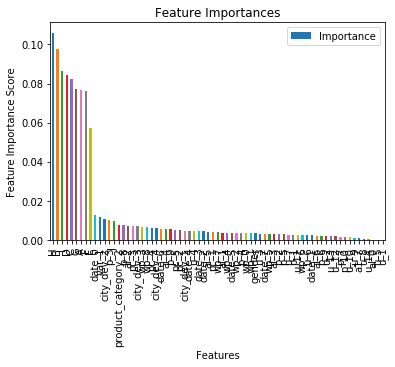

              Features  Importance
68                   H        0.11
62                   B        0.10
69                   I        0.09
64                   D        0.08
63                   C        0.08
67                   G        0.08
61                   A        0.08
66                   F        0.08
65                   E        0.06
53              date_0        0.01
2                var_1        0.01
50          city_dev_2        0.01
22                 p_3        0.01
70                   J        0.01
0   product_category_2        0.01
..                 ...         ...
9                 al_6        0.00
25                 p_6        0.00
36                 u_2        0.00
47                u_13        0.00
46                u_12        0.00
26                 p_7        0.00
29                p_10        0.00
44                u_10        0.00
43                 u_9        0.00
10                a1_7        0.00
42                 u_8        0.00
48                u_

In [56]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn import metrics

useTrainCV=True
cv_folds=5
early_stopping_rounds=50

alg = XGBClassifier(learning_rate=0.15, n_estimators=160, max_depth=7,
                    min_child_weight=3, gamma=0.2, subsample=0.6, colsample_bytree=1.0,
                    objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

if useTrainCV:
    print("Started Feeding Data ------>")
    xgb_param = alg.get_xgb_params()
    xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
    # xgtest = xgb.DMatrix(X_test.values, label=y_test.values)
    cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                      early_stopping_rounds=early_stopping_rounds)
    alg.set_params(n_estimators=cvresult.shape[0])


print('Started Training ------>')
alg.fit(X_train, y_train, eval_metric='auc')

# param_test1 = {}
# gsearch1 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5,
#                                                 min_child_weight=3, gamma=0.2, subsample=0.8,
#                                                 colsample_bytree=1.0,
#                                                 objective='binary:logistic', nthread=4, scale_pos_weight=1,
#                                                 seed=27),
#                         param_grid=param_test1,
#                         scoring='f1',
#                         n_jobs=4, iid=False, cv=5)
# gsearch1.fit(X_train, y_train)
# print(gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_)


print("Started Predicting ------->")
predictions = alg.predict(X_test)
pred_proba = alg.predict_proba(X_test)[:, 1]


print("\nModel")
print("Accuracy : %.4g" % metrics.accuracy_score(y_test, predictions))
print("AUC score test set: %f" % metrics.roc_auc_score(y_test, pred_proba))
print("F1 Score test set: %f" % metrics.f1_score(y_test, predictions))

feat_imp = alg.feature_importances_
feat = X_train.columns.tolist()
# clf.best_estimator_.booster().get_fscore()
res_df = pd.DataFrame({'Features': feat, 'Importance': feat_imp}).sort_values(by='Importance', ascending=False)
res_df.plot('Features', 'Importance', kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()
print(res_df)
print(res_df["Features"].tolist())


In [58]:
input_test_xgb = test.drop(columns=['session_id'])


In [60]:
output_test_xgb = pd.DataFrame(test['session_id'])
pred_test = alg.predict(input_test_xgb)
output_test_xgb['is_click'] = pred_test
output_test_xgb.to_csv('Submission_xgb.csv', index=False, columns=['session_id', 'is_click'])

e:\users\hp\miniconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
